In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
data = pd.read_csv("./data.csv")
ports = data["Source Port"].unique()
ports = ports[ports !=1883]
data


,No.,Time,Source,Destination,Protocol,Length,Topic,Message Identifier,Source Port,Destination Port,Info
0,1035,65.053081,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,53431,1883,Connect Command
1,1036,65.053619,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,57193,1883,Connect Command
2,1037,65.053985,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,58679,1883,Connect Command
3,1038,65.054242,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,45275,1883,Connect Command
4,1039,65.054454,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,49771,1883,Connect Command
...,...,...,...,...,...,...,...,...,...,...,...
2067,5206,166.843035,192.168.15.3,192.168.15.4,MQTT,70,NaN,102.0,1883,49771,Publish Ack (id=102)
2068,5208,166.843422,192.168.15.3,192.168.15.4,MQTT,70,NaN,101.0,1883,60033,Publish Ack (id=101)
2069,5210,166.844864,192.168.15.3,192.168.15.4,MQTT,70,NaN,102.0,1883,57193,Publish Ack (id=102)
2070,5219,167.639217,192.168.15.4,192.168.15.3,MQTT,97,Deviceb'Device - 8',102.0,38615,1883,Publish Message (id=102) [Deviceb'Device - 8']


In [3]:
devices = {}
#  : devices será um dicionario que irá ter uma chave referente ao device e o valor será um dataframe referente aos respectivos devices 
for port in ports:  
  array_publish = data.loc[data["Source Port"] == port].dropna(subset=['Message Identifier'])
  array_publish_ack = data.loc[data["Destination Port"] == port].dropna(subset=['Message Identifier'])
  device = {"publish":array_publish, "publish_ack" : array_publish_ack}
  devices[port] = device

In [4]:
data = {}
for port in ports:
    RTT = pd.DataFrame(columns=["Time_publish", "Time_ack"])
    for index, row in devices[port]["publish"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Time_publish"] = time_publish 

    for index, row in devices[port]["publish_ack"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Time_ack"] = time_publish
    RTT.loc[id, "Time_ack"] = time_publish
    RTT["RTT"]  =(RTT["Time_ack"] - RTT["Time_publish"] )* 1000
    data[port] = RTT


## Medidas de Tendência Central Por Device

In [5]:
i=1
data_mean = []
data_median = []
data_std = []
data_min = []
data_max = []

for port in ports:
  data_mean.append(data[port]["RTT"].mean())
  data_median.append(data[port]["RTT"].mean())
  data_std.append(data[port]["RTT"].mean())
  data_min.append(data[port]["RTT"].mean())
  data_max.append(data[port]["RTT"].mean())

  print("(Device-{})Mean Round Trip Time = {}".format(i ,data[port]["RTT"].mean()))
  print("(Device-{})Median Round Trip Time = {}".format(i ,data[port]["RTT"].median()))
  print("(Device-{})Standard deviation  Round Trip Time = {}".format(i ,data[port]["RTT"].std()))
  print("(Device-{})Min Round Trip Time = {}".format(i ,data[port]["RTT"].min()))
  print("(Device-{})Max Round Trip Time = {}".format(i ,data[port]["RTT"].max()))
  print("---------------------------------------------------------------")

  i+=1

(Device-1)Mean Round Trip Time = 3.7076649803904393
(Device-1)Median Round Trip Time = 2.7517104999930098
(Device-1)Standard deviation  Round Trip Time = 5.5327434163109155
(Device-1)Min Round Trip Time = 1.3640909999992346
(Device-1)Max Round Trip Time = 58.15494099999796
---------------------------------------------------------------
(Device-2)Mean Round Trip Time = 3.386455598039794
(Device-2)Median Round Trip Time = 2.6938724999965302
(Device-2)Standard deviation  Round Trip Time = 4.7110997195310205
(Device-2)Min Round Trip Time = 1.6001679999959606
(Device-2)Max Round Trip Time = 49.25738199997909
---------------------------------------------------------------
(Device-3)Mean Round Trip Time = 3.326682558823493
(Device-3)Median Round Trip Time = 2.831598000000213
(Device-3)Standard deviation  Round Trip Time = 4.649269648689099
(Device-3)Min Round Trip Time = 1.4278929999989032
(Device-3)Max Round Trip Time = 49.17929400002663
------------------------------------------------------

## Medidas de Tendência Central Geral

In [6]:
from statistics import mean 

print("Mean Round Trip Time = {}".format(mean(data_mean)))
print("Median Round Trip Time = {}".format(mean(data_median)))
print("Standard deviation  Round Trip Time = {}".format(mean(data_std)))
print("Min Round Trip Time = {}".format(mean(data_min)))
print("Max Round Trip Time = {}".format(mean(data_max)))


Mean Round Trip Time = 3.6744517595996977
Median Round Trip Time = 3.6744517595996977
Standard deviation  Round Trip Time = 3.6744517595996977
Min Round Trip Time = 3.6744517595996977
Max Round Trip Time = 3.6744517595996977


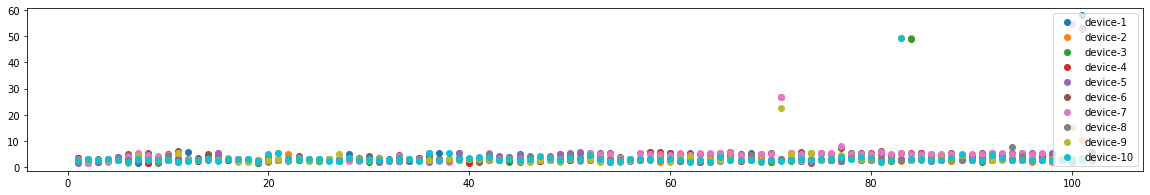

In [11]:
fig, ax = plt.subplots(figsize=(20,3),dpi=72)
i=1
for port in ports:
  ax.scatter(data[port]["RTT"].index,data[port]["RTT"], label='device-{}'.format(i))
  ax.legend()
  i+=1

